In [24]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import csv

!pip install lxml
import requests # library to handle requests
import json # library to handle JSON files

from bs4 import BeautifulSoup
import os


# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
from IPython.display import display_html

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install folium==0.5.0
import folium # plotting library

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns


print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [25]:
# Foursquare credentials
CLIENT_ID = 'POXKMCKLRBDPLZPKVUQWCSQI355YZTNEY4ZMPUQSMSLTWJCA' # your Foursquare ID
CLIENT_SECRET = '4XUXPZQPAJASJV2UPZMDQNJUQ4SJFH2ZKWAMXLUYJLKGDXOJ' # your Foursquare Secret
ACCESS_TOKEN = 'BY23444FV0S1KFUTFU3OV2NURZXYE2Z0XWV1L1FMWML4RIDZ' # your FourSquare Access Token
VERSION = '20180604'
search_query='chickfila'
radius=60000
LIMIT=500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: POXKMCKLRBDPLZPKVUQWCSQI355YZTNEY4ZMPUQSMSLTWJCA
CLIENT_SECRET:4XUXPZQPAJASJV2UPZMDQNJUQ4SJFH2ZKWAMXLUYJLKGDXOJ


In [ ]:
# code that included credentials was used to bring in data and is subsequentally hidden though dataframe persists

In [65]:
# @hidden_cell
body = client_50697048ddff472ab409752679030d48.get_object(Bucket='battleoftheneighborhoods-donotdelete-pr-swj4ltsc0mrrci',Key='va_county_population.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()
body = client_50697048ddff472ab409752679030d48.get_object(Bucket='battleoftheneighborhoods-donotdelete-pr-swj4ltsc0mrrci',Key='va_county_population.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_50697048ddff472ab409752679030d48 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='PAChplq9qWF53Oi-D3PNcp-d0z41e7bDYMyHHEueZBdV',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_50697048ddff472ab409752679030d48.get_object(Bucket='battleoftheneighborhoods-donotdelete-pr-swj4ltsc0mrrci',Key='va_county_pop_lat.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


In [66]:
counties = pd.read_csv(body)
counties.head()

,Virginia County or City,Population Estimate,Latitude,Longitude
0,Accomack County,32673,37.764939,-75.756557
1,Albemarle County,107405,38.022898,-78.556676
2,Alexandria city,157613,38.818454,-77.086206
3,Alleghany County,15157,37.787778,-80.006175
4,Amelia County,12953,37.336026,-77.976138


In [27]:
# convert dataframe columns to lists
latv = counties['Latitude'].tolist()
lonv = counties['Longitude'].tolist()

In [58]:
# create empty list to store iterated urls
urlcontainer = []

# setup "for" loop, pass in lists of latitude and longitude values
for i, j in set(zip(latv, lonv)):

    url='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, i, j, ACCESS_TOKEN,VERSION, search_query,radius,LIMIT)
    
    # add each modified url to list
    urlcontainer.append(url)

# create empty list to store results?
resultslist = []

# create another "for" loop to pass in our modified urls from "urlcontainer"
for x in urlcontainer:
    results = requests.get(x).json()
    venues = results['response']['venues']
    # add results from api request to "resultslist" 
    resultslist.append(venues)
    
# show results for diagostics
print(resultslist)

# convert list into dataframe to store final results
dfchickfilas = pd.DataFrame(resultslist,columns=['results'])

dfchickfilas.head()

KeyError: 'venues'

In [43]:
dfchickfilas = pd.json_normalize(venues)
dfchickfilas.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.city,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,52a0f9aa11d21731d44022a7,Chick-fil-A,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1615431133,False,661 Southpark Blvd,37.245641,-77.389256,"[{'label': 'display', 'lat': 37.2456408, 'lng'...",9523,...,Colonial Heights,VA,United States,"[661 Southpark Blvd, Colonial Heights, VA 23834]",NaN,NaN,NaN,NaN,NaN,NaN
1,4c2a4800c758e21e49663a3f,Chick-fil-A,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1615431133,False,384 Southpark Cir Spc B-10,37.254270,-77.393463,"[{'label': 'display', 'lat': 37.25427, 'lng': ...",9377,...,Colonial Heights,VA,United States,"[384 Southpark Cir Spc B-10, Colonial Heights,...",331181,https://www.grubhub.com/restaurant/chick-fil-a...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png
2,4b75ea6bf964a520892e2ee3,Chick-fil-A,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1615431133,False,2900 W Hundred Rd,37.356416,-77.418265,"[{'label': 'display', 'lat': 37.3564159, 'lng'...",12831,...,Chester,VA,United States,"[2900 W Hundred Rd, Chester, VA 23831]",NaN,NaN,NaN,NaN,NaN,NaN
3,4b3d50f3f964a5203d9225e3,Chick-fil-A,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1615431133,False,4443 S Laburnum Ave,37.527680,-77.355619,"[{'label': 'display', 'lat': 37.5276801, 'lng'...",26773,...,Richmond,VA,United States,"[4443 S Laburnum Ave, Richmond, VA 23231]",NaN,NaN,NaN,NaN,NaN,NaN
4,4bbcd0228a4fb71348323c9d,Chick-fil-A,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1615431133,False,"403 N 13th St, MCV Campus",37.540075,-77.428477,"[{'label': 'display', 'lat': 37.5400747, 'lng'...",29964,...,Richmond,VA,United States,"[403 N 13th St, MCV Campus, Richmond, VA 23298]",NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
import requests

In [54]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dfchickfilas.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dfchickfilas.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Chick-fil-A,Fast Food Restaurant,661 Southpark Blvd,37.245641,-77.389256,"[{'label': 'display', 'lat': 37.2456408, 'lng'...",9523,23834,US,Colonial Heights,VA,United States,"[661 Southpark Blvd, Colonial Heights, VA 23834]",52a0f9aa11d21731d44022a7
1,Chick-fil-A,Fast Food Restaurant,384 Southpark Cir Spc B-10,37.254270,-77.393463,"[{'label': 'display', 'lat': 37.25427, 'lng': ...",9377,23834,US,Colonial Heights,VA,United States,"[384 Southpark Cir Spc B-10, Colonial Heights,...",4c2a4800c758e21e49663a3f
2,Chick-fil-A,Fast Food Restaurant,2900 W Hundred Rd,37.356416,-77.418265,"[{'label': 'display', 'lat': 37.3564159, 'lng'...",12831,23831,US,Chester,VA,United States,"[2900 W Hundred Rd, Chester, VA 23831]",4b75ea6bf964a520892e2ee3
3,Chick-fil-A,Fast Food Restaurant,4443 S Laburnum Ave,37.527680,-77.355619,"[{'label': 'display', 'lat': 37.5276801, 'lng'...",26773,23231,US,Richmond,VA,United States,"[4443 S Laburnum Ave, Richmond, VA 23231]",4b3d50f3f964a5203d9225e3
4,Chick-fil-A,Fast Food Restaurant,"403 N 13th St, MCV Campus",37.540075,-77.428477,"[{'label': 'display', 'lat': 37.5400747, 'lng'...",29964,23298,US,Richmond,VA,United States,"[403 N 13th St, MCV Campus, Richmond, VA 23298]",4bbcd0228a4fb71348323c9d
5,Chick-fil-A,Fast Food Restaurant,12301 Chattanooga Plz,37.429479,-77.623130,"[{'label': 'display', 'lat': 37.4294789, 'lng'...",32573,23112,US,Midlothian,VA,United States,"[12301 Chattanooga Plz, Midlothian, VA 23112]",4b61c433f964a52069212ae3
6,Chick-fil-A,Fast Food Restaurant,14101 Hull Street Rd,37.403540,-77.668545,"[{'label': 'display', 'lat': 37.4035402, 'lng'...",35043,23832,US,Chesterfield,VA,United States,"[14101 Hull Street Rd, Chesterfield, VA 23832]",52d8496511d280028990fe59
7,Chick-fil-A,Fast Food Restaurant,7125 Forest Hill Ave,37.537024,-77.526853,"[{'label': 'display', 'lat': 37.5370239, 'lng'...",33981,23225,US,Richmond,VA,United States,"[7125 Forest Hill Ave, Richmond, VA 23225]",4b3b7e67f964a520997425e3
8,Chick-fil-A,Fast Food Restaurant,7285 Battle Hill Dr,37.608535,-77.356294,"[{'label': 'display', 'lat': 37.6085352, 'lng'...",35661,23111,US,Mechanicsville,VA,United States,"[7285 Battle Hill Dr, Mechanicsville, VA 23111]",4bb279572397b713c71037b3
9,Chick-fil-A,Fast Food Restaurant,"900 Park Ave, VCU Dining Services",37.546500,-77.453312,"[{'label': 'display', 'lat': 37.5465, 'lng': -...",31515,23284,US,Richmond,VA,United States,"[900 Park Ave, VCU Dining Services, Richmond, ...",4c77e1756eee370412705065


In [ ]:
# filter columns
filtered_columns = ['id', 'name', 'address', 'lat', 'lng', 'postalCode', 'city', 'state']
dfchickfilas =dfchickfilas.loc[:, filtered_columns]

In [ ]:
# rename columns
dfchickfilas.rename(columns={'id':'ID', 'name':'Name', 'address':'Address', 'lat':'Latitude', 'lng':'Longitude', 'postalCode':'Zip', 'city':'City', 'state':'State'}, inplace=True)

In [67]:
# @hidden_cell
body = client_50697048ddff472ab409752679030d48.get_object(Bucket='battleoftheneighborhoods-donotdelete-pr-swj4ltsc0mrrci',Key='chickfilas.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dfchickfilas = pd.read_csv(body)

In [ ]:
# code that included credentials was used to bring in data and is subsequentally hidden though dataframe persists

In [ ]:
# brought in simplified location data without lat/long's for further data processing

In [68]:
# bringing in simplified location data without lat/long's for further data processing
body = client_50697048ddff472ab409752679030d48.get_object(Bucket='battleoftheneighborhoods-donotdelete-pr-swj4ltsc0mrrci',Key='vazippop.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dfvapop = pd.read_csv(body)
dfvapop.head()

,Zip,Population
0,22193,82309
1,23464,76421
2,22191,71019
3,23462,65906
4,23322,64972


In [69]:
# merging population by zip code with Foursquare results for further processing
df1=pd.merge(dfchickfilas, dfvapop)
df1.head()

,Unnamed: 0,ID,Name,Address,Latitude,Longitude,Zip,City,State,Population
0,0,4cdacf9db34e60fc3a304499,Chick-fil-A,2200 Crystal Dr Ste G,38.854470,-77.049630,22202,Arlington,VA,25409
1,1,5bc024445d891b002c6c2ef5,Chick-fil-A,671 N Glebe Rd Ste 1270,38.878780,-77.111093,22203,Arlington,VA,24309
2,2,4c0ebe69336220a1a9b5cc77,Chick-fil-A,1576 Rio Rd E,38.076894,-78.474480,22901,Charlottesville,VA,35372
3,4,4b59e60df964a5204e9f28e3,Chick-fil-A,350 Woodbrook Dr,38.088568,-78.470807,22901,Charlottesville,VA,35372
4,3,563cafa8cd1088eed1c78179,Chick-fil-A,1626 Richmond Rd,38.029109,-78.440447,22911,Charlottesville,VA,17441


In [70]:
# removing unnecessary first column
df1.drop(df1.columns[df1.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df1.head()

,ID,Name,Address,Latitude,Longitude,Zip,City,State,Population
0,4cdacf9db34e60fc3a304499,Chick-fil-A,2200 Crystal Dr Ste G,38.854470,-77.049630,22202,Arlington,VA,25409
1,5bc024445d891b002c6c2ef5,Chick-fil-A,671 N Glebe Rd Ste 1270,38.878780,-77.111093,22203,Arlington,VA,24309
2,4c0ebe69336220a1a9b5cc77,Chick-fil-A,1576 Rio Rd E,38.076894,-78.474480,22901,Charlottesville,VA,35372
3,4b59e60df964a5204e9f28e3,Chick-fil-A,350 Woodbrook Dr,38.088568,-78.470807,22901,Charlottesville,VA,35372
4,563cafa8cd1088eed1c78179,Chick-fil-A,1626 Richmond Rd,38.029109,-78.440447,22911,Charlottesville,VA,17441


In [71]:
# creating new dataframe which counts how many chick-fil-a's are in each zip code and sorting in descending order
df2=df1.groupby('Zip', as_index=False).count()[['Zip', 'Name']]
df2.columns=['Zip', 'Venues']
df2.sort_values(['Venues'], ascending=False).head()

,Zip,Venues
51,23320,4
84,24502,4
8,20166,4
27,22407,3
29,22601,3


In [72]:
# merging location counts back with population data
df2=pd.merge(df2, dfvapop)
df2.head()

,Zip,Venues,Population
0,20109,2,43093
1,20110,1,47574
2,20132,1,18053
3,20147,2,63878
4,20151,2,23068


In [76]:
# calculating number of chick-fil-a's per capita based on population data
df2['percap']=df2['Venues'] / df2['Population']
df2['percap']=df2['percap']*1e5 # multiplying by 100,000
df2

,Zip,Venues,Population,percap
0,20109,2,43093,4.641125
1,20110,1,47574,2.101988
2,20132,1,18053,5.539246
3,20147,2,63878,3.130968
4,20151,2,23068,8.670019
...,...,...,...,...
81,24202,1,11127,8.987148
82,24293,1,9575,10.443864
83,24401,1,35718,2.799709
84,24502,4,46044,8.687343


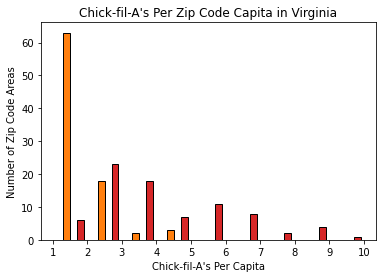

In [75]:
# plotting per capita calculations 
bins=[1,2,3,4,5,6,7,8,9,10]
plt.hist(df2.values, bins=bins, edgecolor='k')
plt.xticks(bins)
plt.xlabel("Chick-fil-A's Per Capita")
plt.ylabel('Number of Zip Code Areas')
plt.title("Chick-fil-A's Per Zip Code Capita in Virginia")
plt.show()

# The majority of zip codes with Chick-fil-A locations have between 1 and 2 locations per 100,000 people

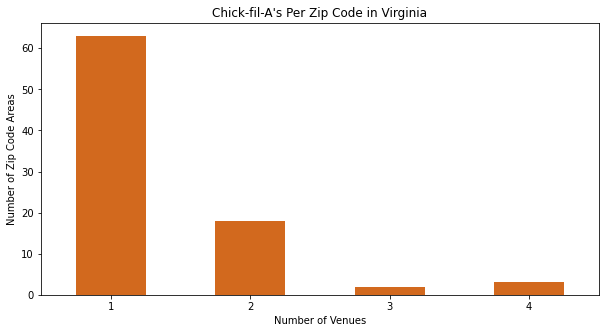

In [78]:
# Plotting how many zip codes have 1-4 Chick-fil-A locations
df2.groupby('Venues')['Zip'].count().plot.bar(figsize=(10,5), color='chocolate')
plt.xlabel('Number of Venues')
plt.ylabel('Number of Zip Code Areas')
plt.title("Chick-fil-A's Per Zip Code in Virginia")
plt.xticks(rotation='horizontal')
plt.legend
plt.show()

In [79]:
# create map and display it
Latitude=37.4316
Longitude=-78.6569
va_map = folium.Map(location=[Latitude, Longitude], zoom_start=7)

# instantiate a feature group for the ratings in the dataframe
chickfilas = folium.map.FeatureGroup()

In [ ]:
# add each Chick-fil-A location
for lat, lng, in dfchickfilas[['Latitude','Longitude']].values:
    chickfilas.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color='orange',
            fill_opacity=0.6
        )
    )
# add venues to map
va_map.add_child(chickfilas)

In [ ]:
# create map on business question focus area and display it
Latitude=38.2105
Longitude=-78.2704
Focus_area_map = folium.Map(location=[Latitude, Longitude], zoom_start=10)

# instantiate a feature group for the ratings in the dataframe
chickfilas = folium.map.FeatureGroup()

# add each Chick-fil-A location
for lat, lng, in dfchickfilas[['Latitude','Longitude']].values:
    chickfilas.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color='orange',
            fill_opacity=0.6
        )
    )
# add venues to map
Focus_area_map.add_child(chickfilas)

In [80]:
# separating focus area zip codes into new dataframe for test data
testdata=dfvapop[(dfvapop['Zip'].isin(['22542', '22567', '22636', '22709', '22713', '22715', '22719', '22722', '22725', '22727', '22729', '22730', '22731', '22732', '22733', '22735', '22738', '22902', '22903', '22904', '22920', '22923', '22924', '22931', '22932', '22935', '22936', '22937', '22938', '22940', '22942', '22943', '22946', '22947', '22948', '22958', '22959', '22960', '22963', '22968', '22969', '22972', '22973', '22974', '23022', '23038', '23055', '23065', '23084', '23093', '23117', '23153', '24590']))]
testdata.head()

,Zip,Population
42,22903,40652
126,22902,25245
181,22963,16571
200,23093,13992
231,22968,10562


In [81]:
# adding a blank Venues column
testdata['Venues']=''
testdata.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Zip,Population,Venues
42,22903,40652,
126,22902,25245,
181,22963,16571,
200,23093,13992,
231,22968,10562,


In [83]:
# creating training data
traindata=df2
traindata.head()

,Zip,Venues,Population,percap
0,20109,2,43093,4.641125
1,20110,1,47574,2.101988
2,20132,1,18053,5.539246
3,20147,2,63878,3.130968
4,20151,2,23068,8.670019


In [84]:
# removing outlier data
traindata=traindata[~(traindata['percap'] > 10)]

In [85]:
traindata.shape

(80, 4)

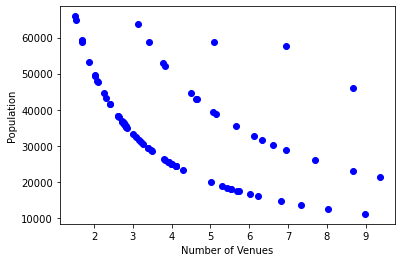

In [86]:
# plotting training data to determine model
plt.scatter(traindata.percap, traindata.Population,  color='blue')
plt.xlabel("Number of Venues")
plt.ylabel("Population")
plt.show()

In [87]:
#creating polynomial regression model due to curved data
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(traindata[['Population']])
train_y = np.asanyarray(traindata[['Venues']])

test_x = np.asanyarray(testdata[['Population']])
test_y = np.asanyarray(testdata[['Venues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 4.30930000e+04, 1.85700665e+09],
       [1.00000000e+00, 4.75740000e+04, 2.26328548e+09],
       [1.00000000e+00, 1.80530000e+04, 3.25910809e+08],
       [1.00000000e+00, 6.38780000e+04, 4.08039888e+09],
       [1.00000000e+00, 2.30680000e+04, 5.32132624e+08],
       [1.00000000e+00, 3.53020000e+04, 1.24623120e+09],
       [1.00000000e+00, 3.66420000e+04, 1.34263616e+09],
       [1.00000000e+00, 4.16840000e+04, 1.73755586e+09],
       [1.00000000e+00, 2.56190000e+04, 6.56333161e+08],
       [1.00000000e+00, 5.28620000e+04, 2.79439104e+09],
       [1.00000000e+00, 1.99500000e+04, 3.98002500e+08],
       [1.00000000e+00, 1.24670000e+04, 1.55426089e+08],
       [1.00000000e+00, 4.45230000e+04, 1.98229753e+09],
       [1.00000000e+00, 1.89090000e+04, 3.57550281e+08],
       [1.00000000e+00, 5.93320000e+04, 3.52028622e+09],
       [1.00000000e+00, 3.33790000e+04, 1.11415764e+09],
       [1.00000000e+00, 3.94780000e+04, 1.55851248e+09],
       [1.00000000e+00, 1.36160

In [88]:
# getting coefficients
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  1.71153878e-05 -2.97660210e-11]]
Intercept:  [0.7549654]


Text(0, 0.5, 'Number of Venues')

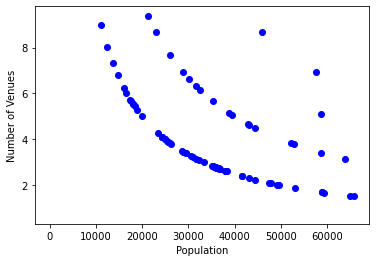

In [90]:
# testing model
plt.scatter(traindata.Population, traindata.percap,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Population")
plt.ylabel("Number of Venues")

In [92]:
# Sorting by population data to determine best zip code to build a Chick-fil-A in focus area that where none already exist
testdata['Venues']='NaN'
testdata=testdata.sort_values('Population', ascending=False)
testdata.head()

,Zip,Population,Venues
42,22903,40652,NaN
126,22902,25245,NaN
181,22963,16571,NaN
200,23093,13992,NaN
231,22968,10562,NaN


# Zip Codes 22903, 22902, and 22963 are the top 3 best areas to build Chick-fil-As based on current locations versus population